### Heart Diseases Analysis

Note: this notebook was forked from [Roshan Sharma](http://https://www.kaggle.com/roshansharma/heart-diseases-analysis/notebook) and new analisys were added from it!

In [1]:
# Basic operations
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
from scipy.stats import norm
# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
#Modeling: Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#Model explanation
import eli5 
from eli5.sklearn import PermutationImportance
import shap 
from pdpbox import pdp, info_plots #for partial plots

%matplotlib inline

# for providing path
import os
#print(os.listdir('../input/'))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.

Using TensorFlow backend.


In [2]:
# reading the data
data = pd.read_csv('../input/heart-disease-uci/heart.csv')

##/kaggle/input/heart-disease-uci/heart.csv


# getting the shape
data.shape

(303, 14)

### Data description

age: The person's age in years


sex: The person's sex (1 = male, 0 = female)


cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)


trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)


chol: The person's cholesterol measurement in mg/dl


fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)


restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)


thalach: The person's maximum heart rate achieved


exang: Exercise induced angina (1 = yes; 0 = no)


oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)


slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)


ca: The number of major vessels (0-3)


thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)


target: Heart disease (0 = no, 1 = yes)


In [3]:
# Checking dataset head
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Describing dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Visualizations

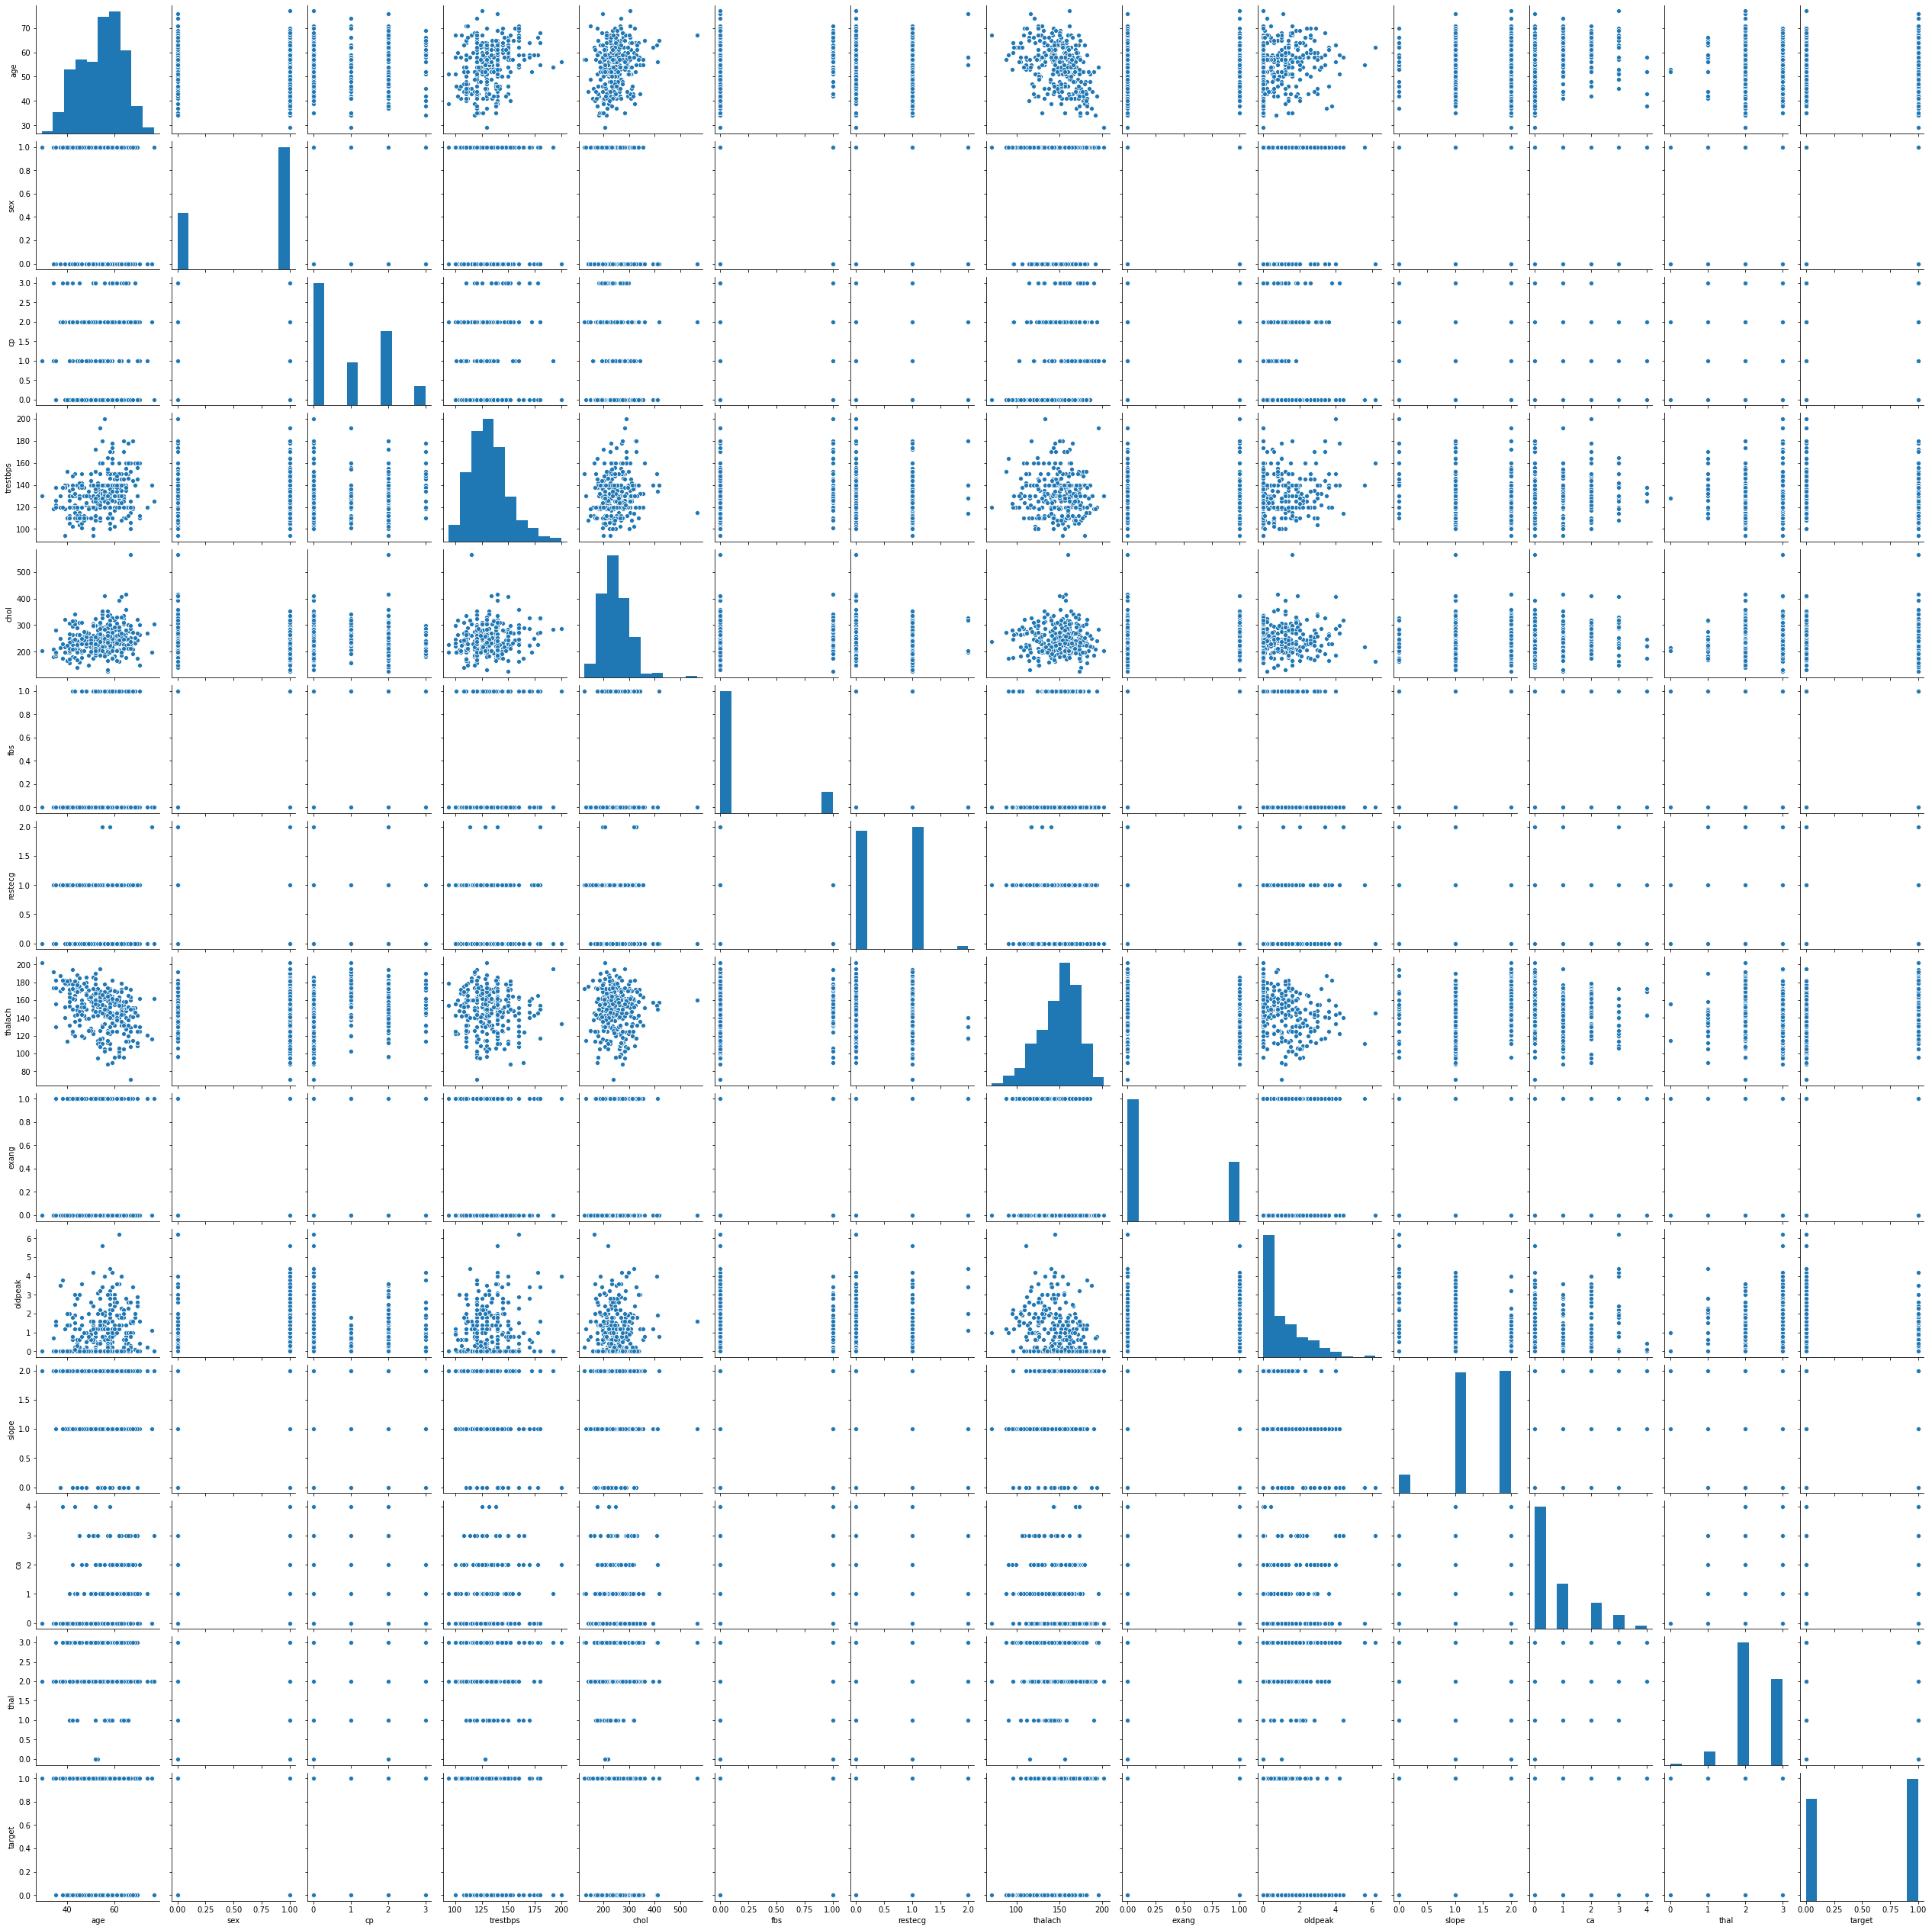

In [5]:
#Pairplot
sns.pairplot(data)

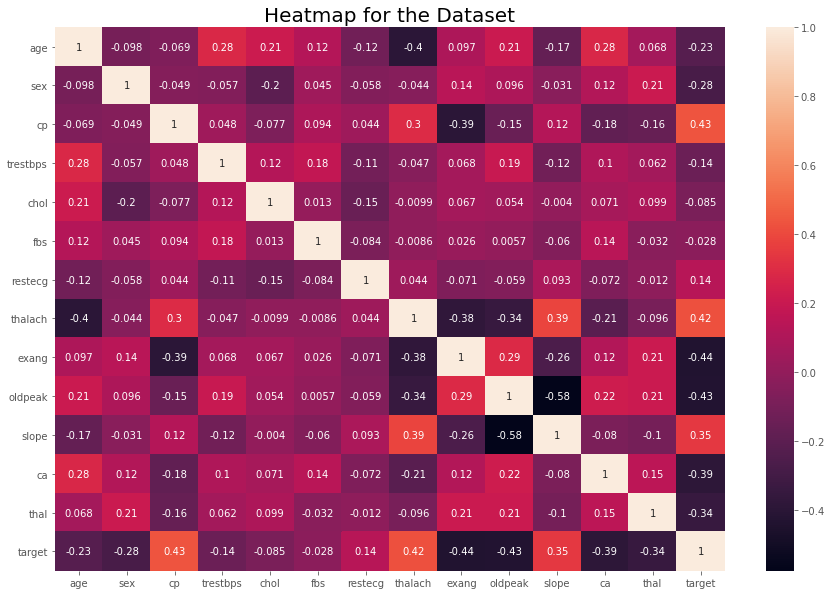

In [6]:
# Heatmap
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('ggplot')
sns.heatmap(data.corr(), annot = True)
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

> The above heat map shows the correlations amongst the different attributes of the given dataset. Almost all of the features/attributes are lower correlated with each other. This implies we must include all of the features, as we can only eliminate those features where the correlation of two or more features are very high.

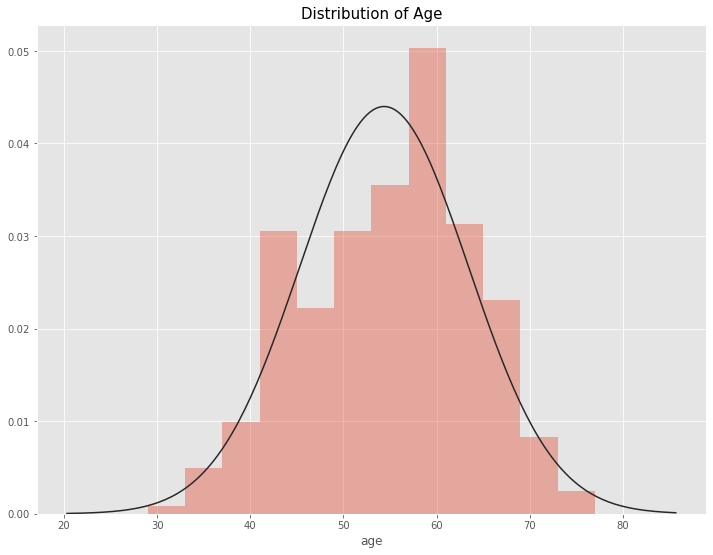

In [7]:
# Checking the distribution of age amonng the patients
plt.rcParams['figure.figsize'] = (12, 9)
sns.distplot(data['age'], fit=norm, kde=False)
plt.title('Distribution of Age', fontsize = 15)
plt.show()

> The above Distribution plot shows the distribution of Age amongst all of the entries in the dataset about the heart patients. The Graph suggests that the highest number of people suffering from heart diseases are in the age group of 55-65 years. The patients in the age group 20-30 are very less likely to suffer from heart diseases.
>> As we know that the number of people in the age group 65-80 has a very low population, hence distribution is also less. we might have to opt for other plots to investigate further and get some more intuitive results.

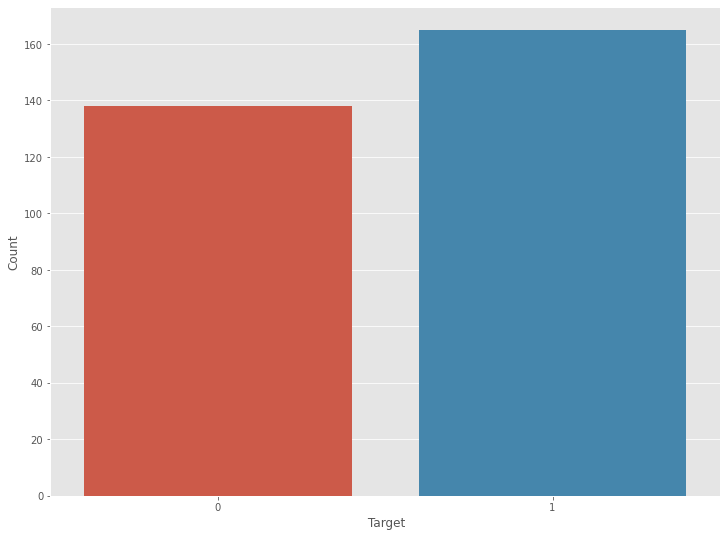

In [8]:
# Checking Target
plt.rcParams['figure.figsize'] = (12, 9)
sns.countplot(data['target'])
plt.xlabel(" Target")
plt.ylabel("Count")
plt.show()

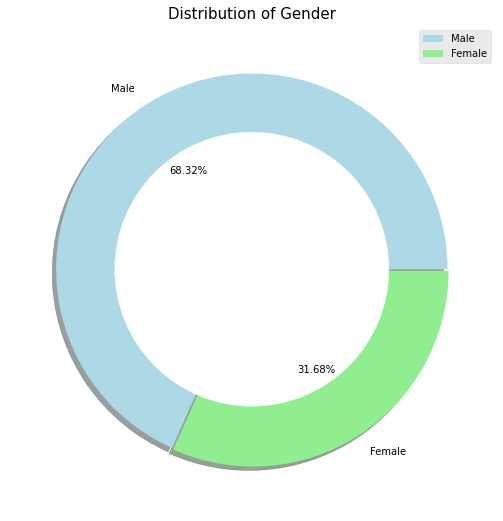

In [9]:
# Checking gender distribuition
plt.rcParams['figure.figsize'] = (12, 9)
size = data['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]
my_circle = plt.Circle((0, 0), 0.7, color = 'white')
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 15)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

> The above Pie chart, whhich shows us the distribution of Gender in this study. Males are almost two times more likely to suffer from heart diseases in comparison to females: 68% of the patients are men whereas only 32% are women.

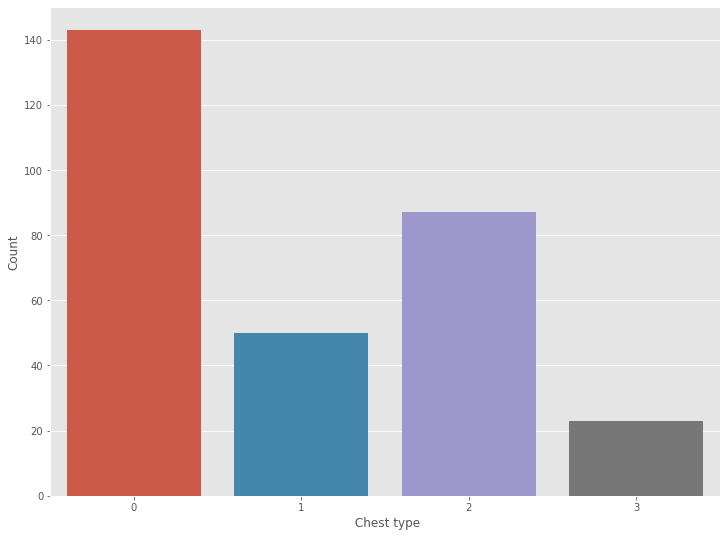

In [10]:
# Checking chest type
plt.rcParams['figure.figsize'] = (12, 9)
sns.countplot(data['cp'])
plt.xlabel(" Chest type")
plt.ylabel("Count")
plt.show()

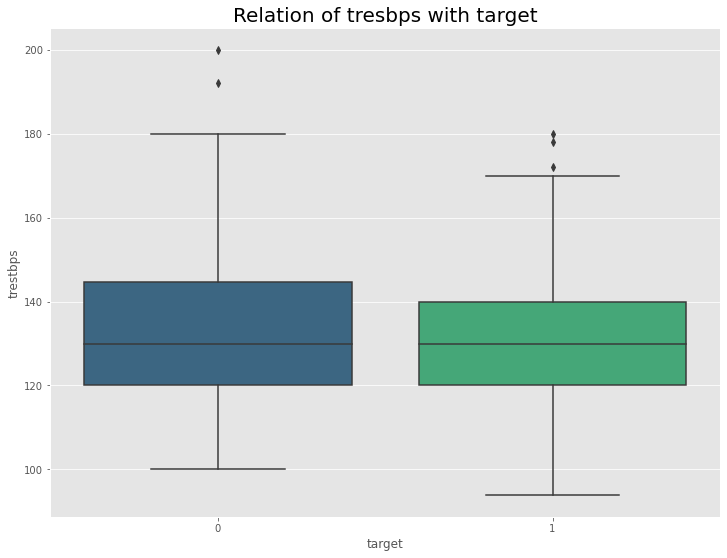

In [11]:
# tresbps vs target
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(data['target'], data['trestbps'], palette = 'viridis')
plt.title('Relation of tresbps with target', fontsize = 20)
plt.show()

> tresbps: Resting Blood Pressure 
>> The above plot suggests that the patients who are most likely to not suffer from the disease have a slighly greater blood pressure than the patients who have heart diseases.

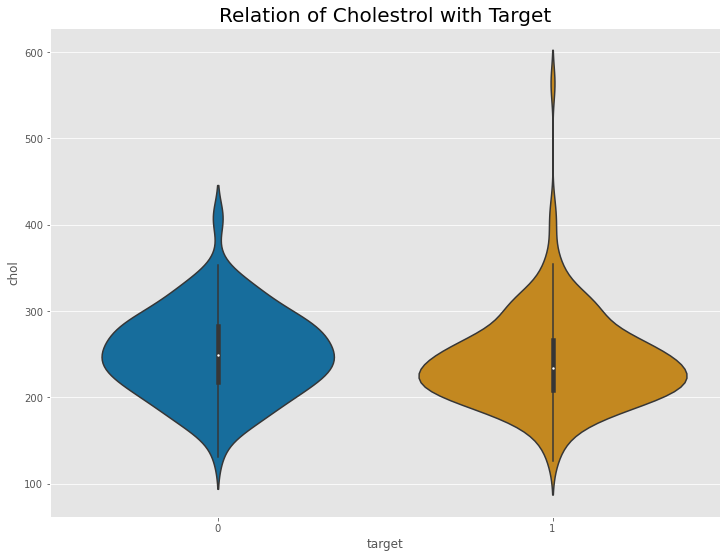

In [12]:
# cholestrol vs target
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(data['target'], data['chol'], palette = 'colorblind')
plt.title('Relation of Cholestrol with Target', fontsize = 20, fontweight = 30)
plt.show()

> The above plot between cholestrol levels and target suggests that the Patients likely to suffer from heart diseases are having higher cholestrol levels in comparison to the patients with target 0(likely to not suffer from the heart diseases.

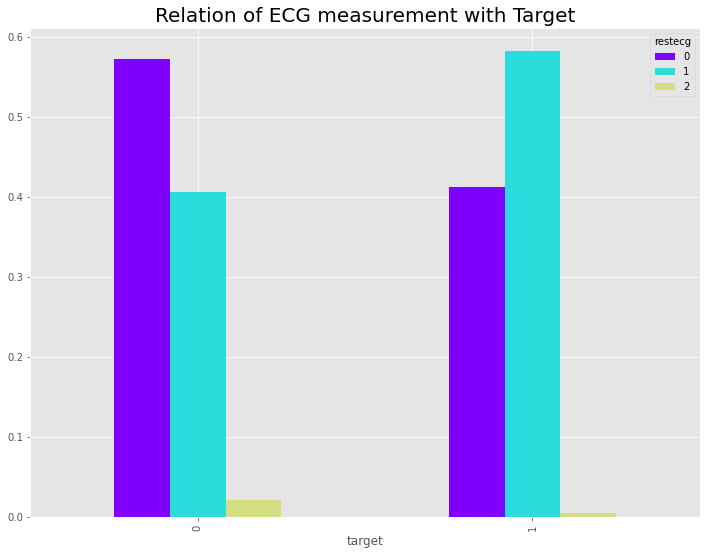

In [13]:
# Resting electrocardiographic measurement vs target
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(data['target'], data['restecg']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of ECG measurement with Target', fontsize = 20, fontweight = 30)
plt.show()

> The column bar chart represents target vs ECG Measurements(Electro Cardio Gram)
>> We can observe that  the mahority of patients not likely to suffer from heart diseases are having restscg value 0 whereas those having restecg value 1 are more likelihood to suffer from a heart disease.

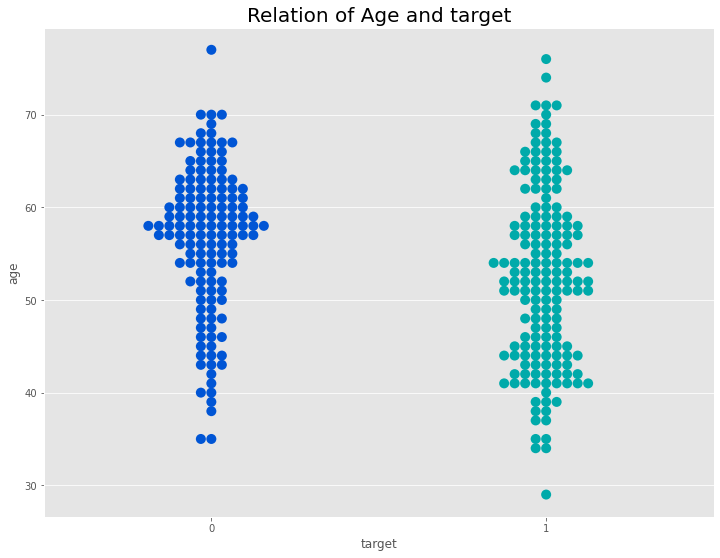

In [14]:
# Relation between age and target
plt.rcParams['figure.figsize'] = (12, 9)
sns.swarmplot(data['target'], data['age'], palette = 'winter', size = 10)
plt.title('Relation of Age and target', fontsize = 20, fontweight = 30)
plt.show()

> From the above Swarm plot, it is not possible to find any clue or pattern between age and ddisease development, so age is not a very good attribute to determine the heart disease of a patient as a patient of heart diseases range from 30-70, whereas it is not important that all of the people lying in that same age group are bound to suffer from the heart diseases.

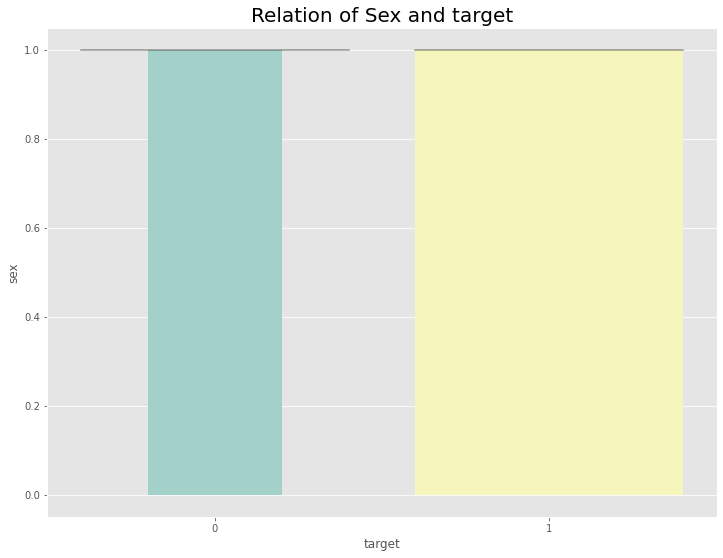

In [15]:
# Relation between sex and target
sns.boxenplot(data['target'], data['sex'], palette = 'Set3')
plt.title('Relation of Sex and target', fontsize = 20, fontweight = 30)
plt.show()

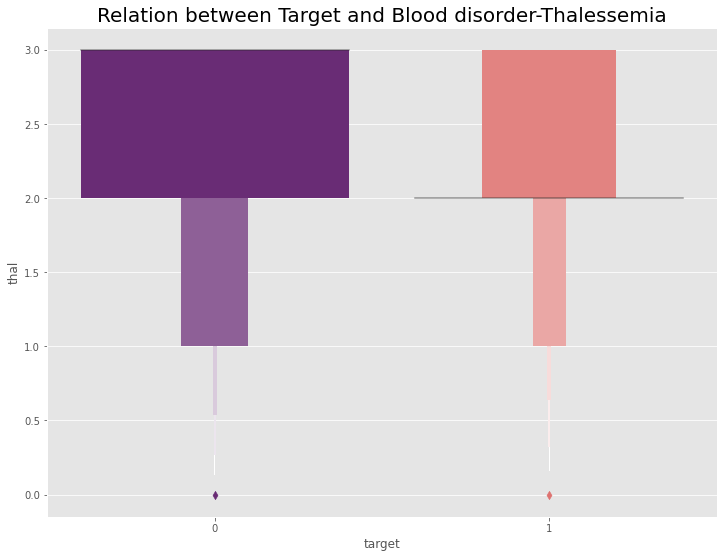

In [16]:
# Relation between thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
sns.boxenplot(data['target'], data['thal'], palette = 'magma')
plt.title('Relation between Target and Blood disorder-Thalessemia', fontsize = 20, fontweight = 30)
plt.show()

>In the above Boxen plot between Target and a Blood disorder called Thalessemia, It can be inferred that the patients suffering from heart diseases have low chances of also suffering from thalessemia in comparison to the patients who are less likely to suffer from the heart diseases. Hence, it is also a good feature to classify heart diseases.

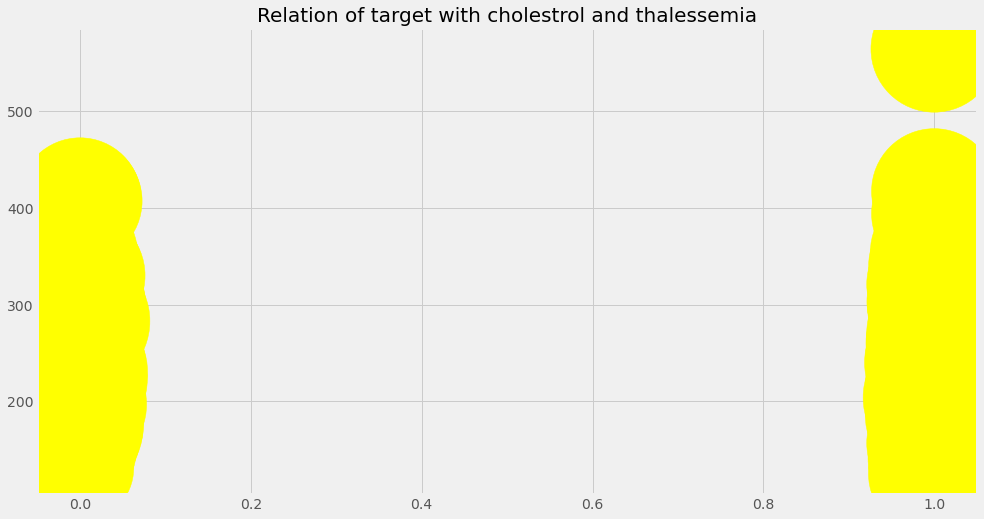

In [17]:
# target vs chol and hue = thalach
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')
plt.scatter(x = data['target'], y = data['chol'], s = data['thalach']*100, color = 'yellow')
plt.title('Relation of target with cholestrol and thalessemia', fontsize = 20, fontweight = 30)
plt.show()

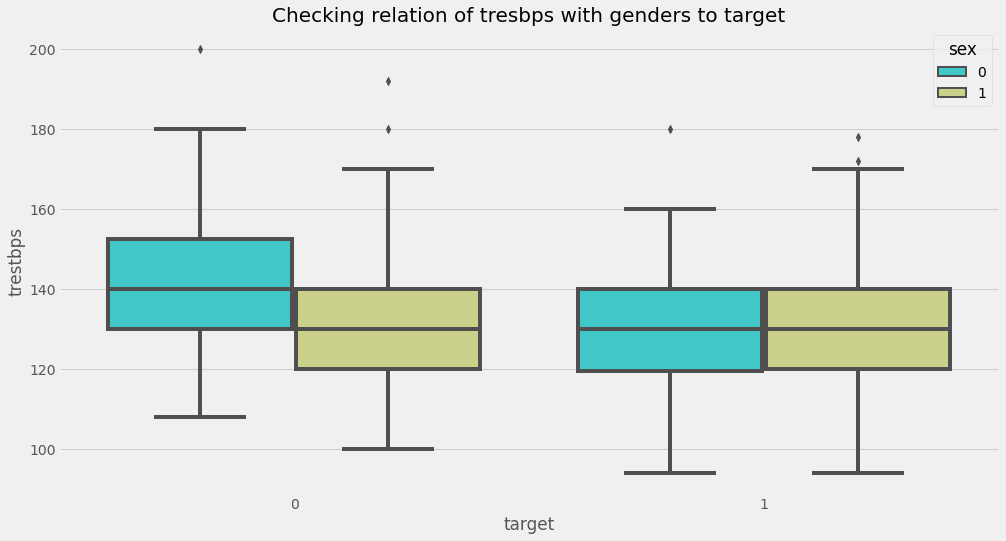

In [18]:
# multi-variate analysis
sns.boxplot(x = data['target'], y = data['trestbps'], hue = data['sex'], palette = 'rainbow')
plt.title('Checking relation of tresbps with genders to target', fontsize = 20, fontweight = 30)
plt.show()

> In the above Box plot between Target and tresbps wrt Gender, shows that Women have higher tresbps than men in case of not suffering from any heart diseases, whereas men and women have almost equal tresbps in case of suffering from a heart diseases. Also, In case of suffering from heart diseases, patients have a slightly lower tresbps in comparison to the patients who are not suffering from heart diseases.

In [19]:
# Changing columns names
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [20]:
# Preparing labels to encode
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 4] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [21]:
# Checking type of data in our dataframe
data.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [22]:
# Converting columns in objects
data['sex'] = data['sex'].astype('object')
data['chest_pain_type'] = data['chest_pain_type'].astype('object')
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].astype('object')
data['rest_ecg'] = data['rest_ecg'].astype('object')
data['exercise_induced_angina'] = data['exercise_induced_angina'].astype('object')
data['st_slope'] = data['st_slope'].astype('object')
data['thalassemia'] = data['thalassemia'].astype('object')

In [23]:
# Taking the labels out from the data 
y = data['target']
data = data.drop('target', axis = 1)
print("Shape of y:", y.shape)

Shape of y: (303,)


In [24]:
# OneHot encoding of the data
# drop_first = True, means dropping the first categories from each of the attribues 
# for ex gender having gender_male and gender-female would be male having values 1 and 0
data = pd.get_dummies(data, drop_first=True)

In [25]:
# Checking the dataset after encoding
data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,0,1,1,0,1,0,0


In [26]:
# Splitting the dependent and independent variables from the data
x = data

In [27]:
# Checking the shapes of x and y
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (303, 19)
Shape of y: (303,)


In [28]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [29]:
# Splitting the sets into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [30]:
# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (242, 19)
Shape of x_test : (61, 19)
Shape of y_train : (242,)
Shape of y_test : (61,)


### Modelling: Random Forest Classifier

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [31]:
#Creating a function to find the best value for n_estimators, considering 3 folders cross-validation 
def get_score(n_estimators):
    """Return the precision over 5 CV folds"""
    random_forest_pipeline = Pipeline(steps=[('model', RandomForestClassifier(n_estimators, max_depth=5))])
    scores = cross_val_score(random_forest_pipeline, x, y,
                                  cv=5,
                                  scoring='precision')
    return scores.mean()

In [32]:
results_random_forest = {}
for i in range(1,9):
    results_random_forest[50*i] = get_score(50*i)

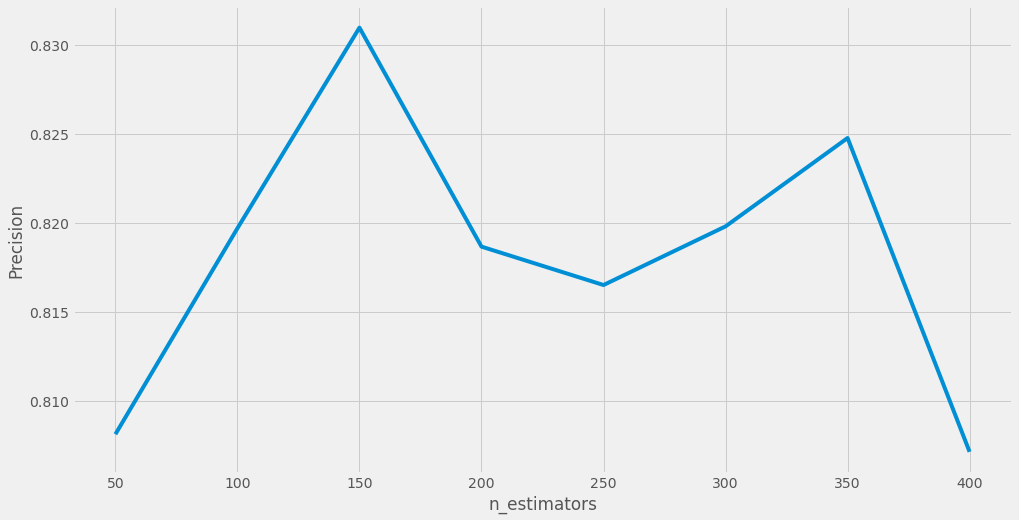

In [33]:
plt.plot(list(results_random_forest.keys()), list(results_random_forest.values()))
plt.xlabel('n_estimators')
plt.ylabel('Precision')
plt.show()

In [34]:
#Finding the best n_estimators
n_estimators_random_forest = min(results_random_forest, key=results_random_forest.get)
n_estimators_random_forest

400

In [35]:
#Fitting Model
model = RandomForestClassifier(n_estimators = n_estimators_random_forest, random_state=0, max_depth=5, n_jobs=8)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=8,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [36]:
# Getting predictions
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]  #predict_proba(self, X) ---Probability estimates.
y_pred = model.predict(x_test)

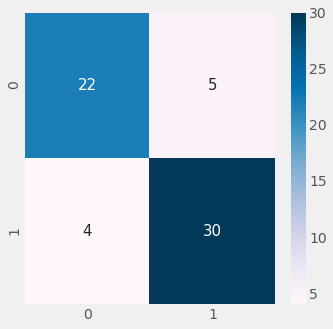

In [37]:
# Generating Cofusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

A confusion matrix is a technique for summarizing the performance of a classification algorithm. Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset. Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.

In [38]:
# Generating Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [39]:
# Computing Accuracy for training and test data
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9338842975206612
Testing Accuracy : 0.8524590163934426


In [40]:
#Computing Matthews Correlation Coefficient
print('Matthews Correlation Coefficient:', matthews_corrcoef(y_test, y_pred))

Matthews Correlation Coefficient: 0.7002255239802613


Diagnostic tests are often sold, marketed, cited and used with sensitivity and specificity as the headline metrics. 
- Sensitivity = TruePositives/TruePositives+FalseNegatives
- Specificity = FalseNegatives/FalseNegatives+TruePositives

In [41]:
# Computing Specificity and Sensitivity scores
total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8461538461538461
Specificity :  0.8571428571428571


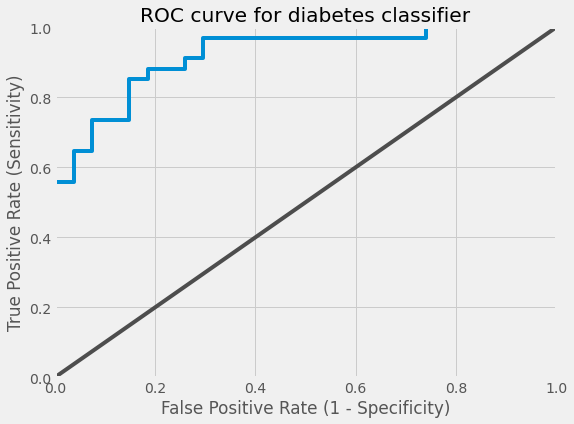

In [42]:
#ROC Curve

#Computing fpr (false positives rate), tpr (true positives rate) and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

#Ploting ROC Curve
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [43]:
# Checking AUC score
auc = auc(fpr, tpr)
print("AUC Score :", auc)

AUC Score : 0.920479302832244


### Model Explanation

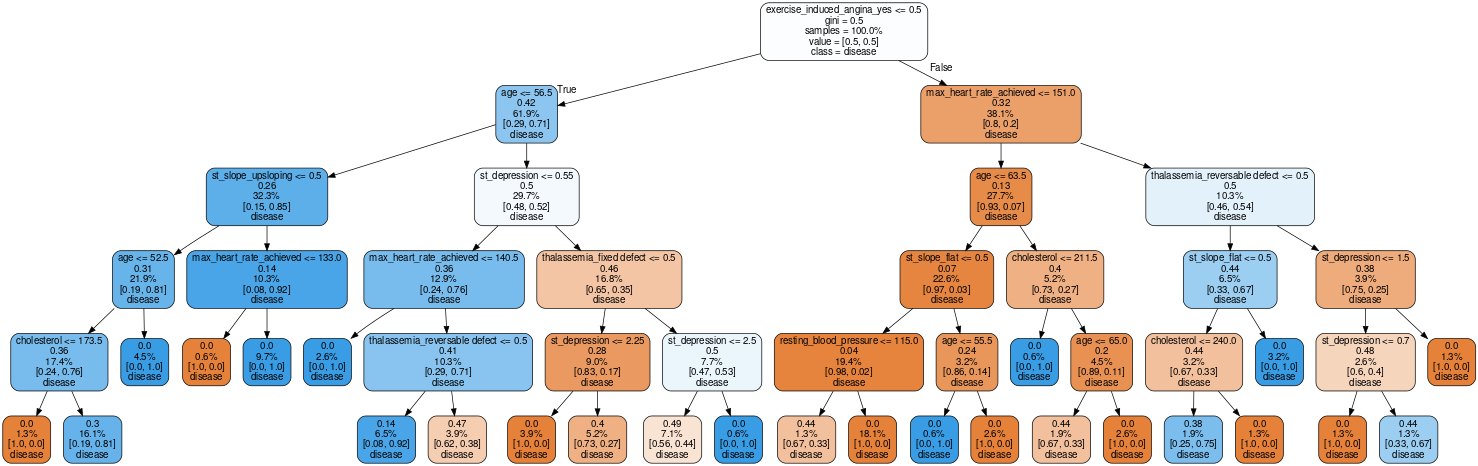

In [44]:
#Tree for Model Explanation
from sklearn.tree import export_graphviz
estimator = model.estimators_[1]
feature_names = [i for i in x_train.columns]
y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=50'])
from IPython.display import Image
Image(filename = 'tree.png')

**Eli5 Values**

In [45]:
# Checking the importance of each attributes
perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0656 ± 0.0994,num_major_vessels
0.0262 ± 0.0491,thalassemia_fixed defect
0.0230 ± 0.0161,st_slope_flat
0.0197 ± 0.0245,st_depression
0.0197 ± 0.0131,age
0.0164 ± 0.0207,chest_pain_type_atypical angina
0.0131 ± 0.0131,thalassemia_reversable defect
0.0098 ± 0.0445,exercise_induced_angina_yes
0.0066 ± 0.0262,sex_male
0.0033 ± 0.0131,thalassemia_normal


**Partial Dependence Plot for Top 5 Features**

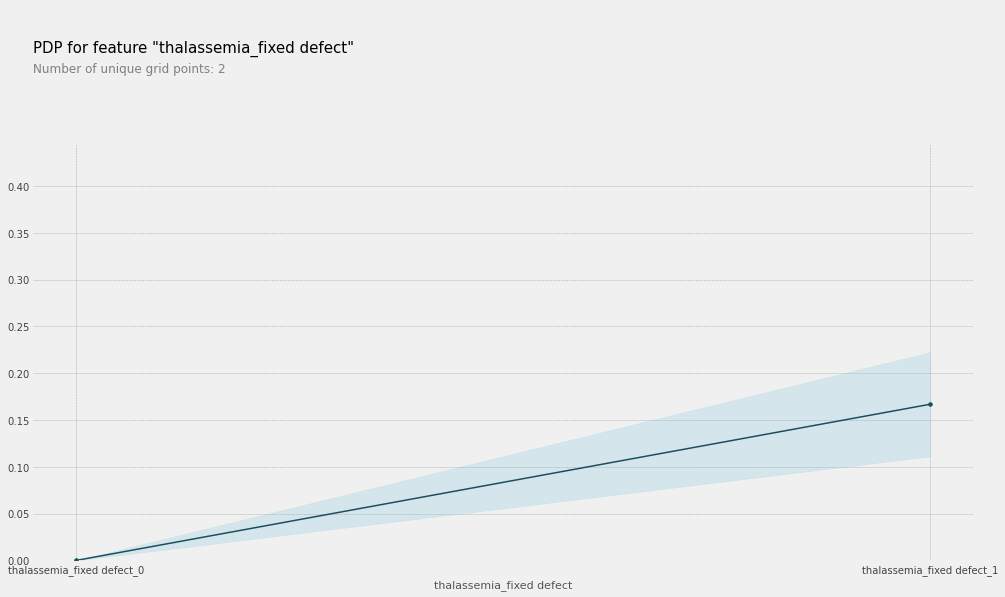

In [46]:
# Partial dependence plot for thalassemia_fixed defect
base_features = data.columns.values.tolist()
feat_name = 'thalassemia_fixed defect'
pdp_dist = pdp.pdp_isolate(model = model, dataset = x_test, model_features = base_features, feature = feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

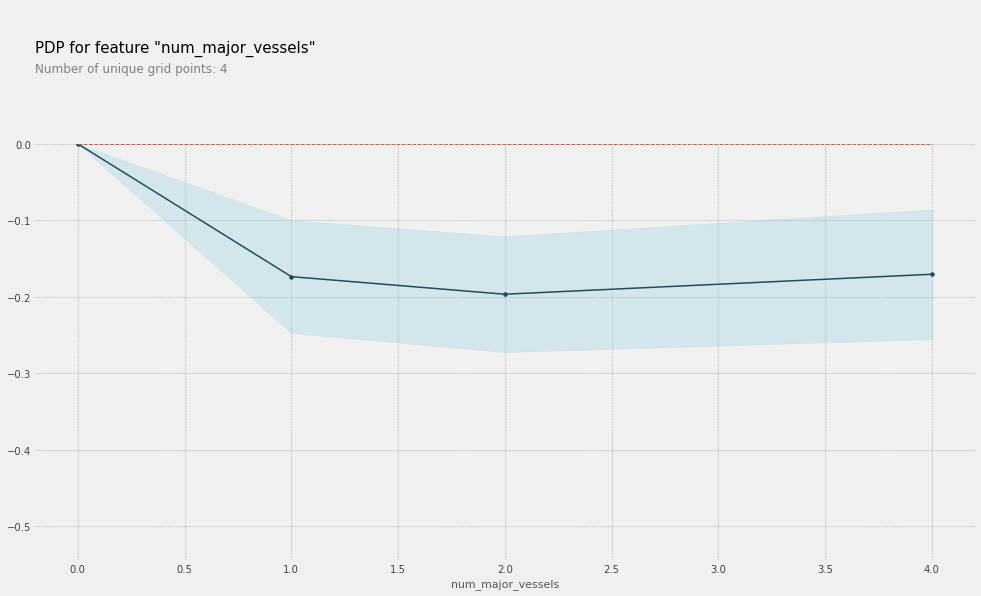

In [47]:
# Partial dependence plot for num_major_vessels
base_features = data.columns.values.tolist()
feat_name = 'num_major_vessels'
pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

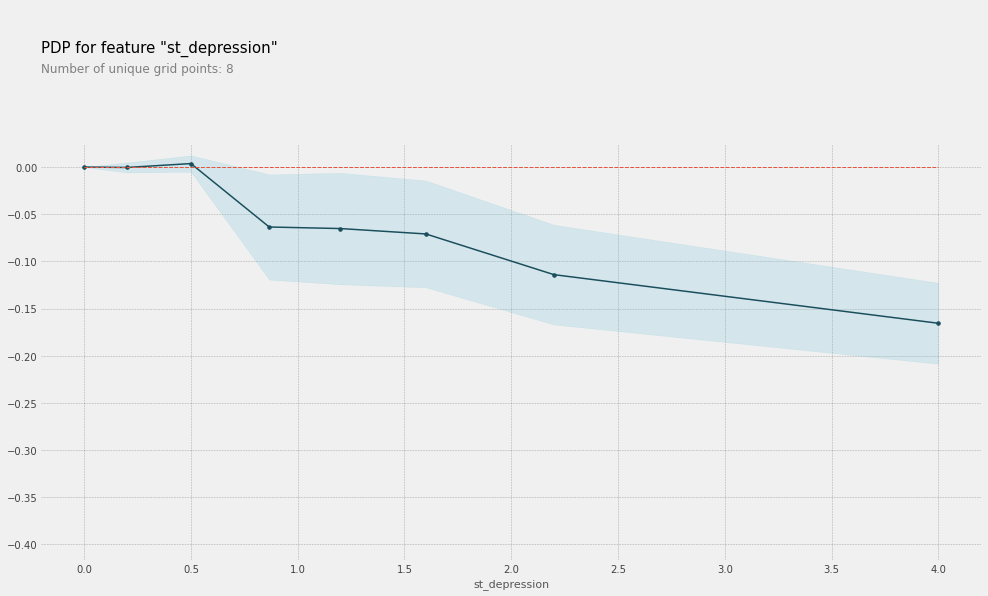

In [48]:
# Partial dependence graph for st_depression
base_features = data.columns.values.tolist()
feat_name = 'st_depression'
pdp_dist = pdp.pdp_isolate(model = model, dataset = x_test, model_features = base_features, feature = feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

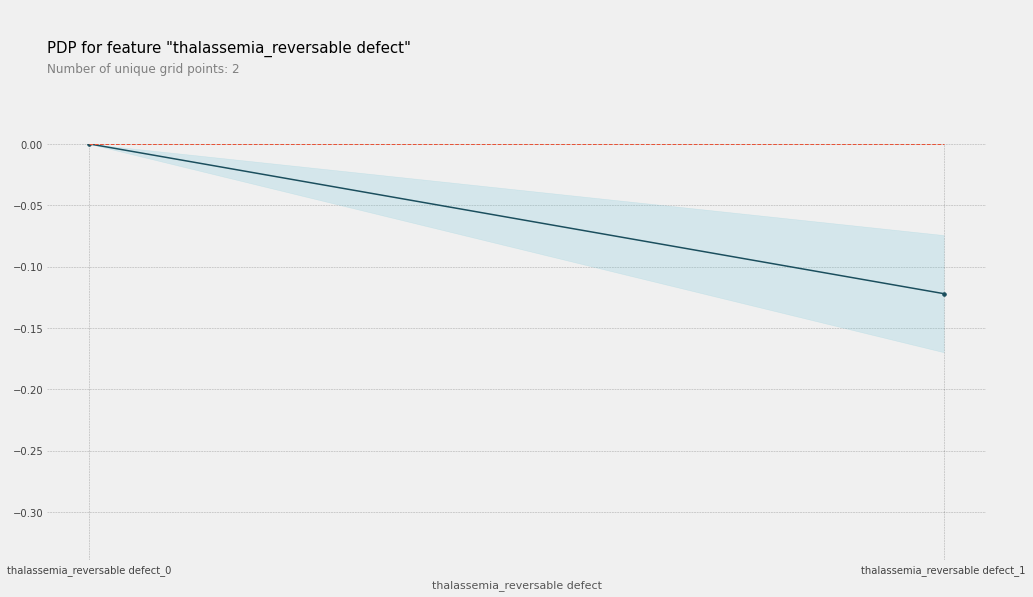

In [49]:

# Partial dependence plot for thalassemia_reversable defect
base_features = data.columns.values.tolist()
feat_name = 'thalassemia_reversable defect'
pdp_dist = pdp.pdp_isolate(model = model, dataset = x_test, model_features = base_features, feature = feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

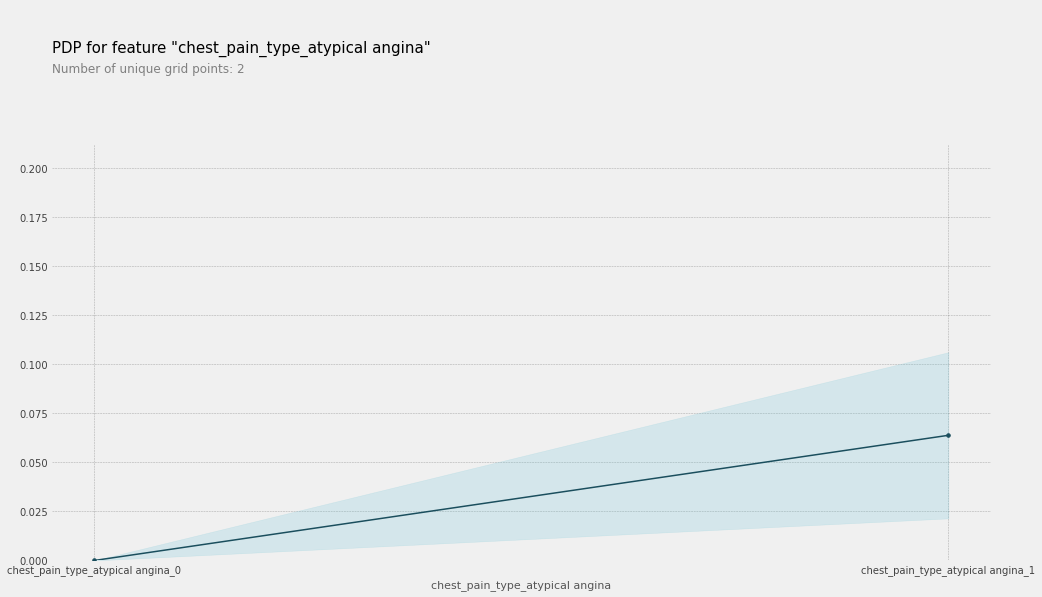

In [50]:
# Partial dependence graph for chest_pain_type_atypical angina
base_features = data.columns.values.tolist()
feat_name = 'chest_pain_type_atypical angina'
pdp_dist = pdp.pdp_isolate(model = model, dataset = x_test, model_features = base_features, feature = feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

**Shap Values**

In [51]:
# Checking shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[1], x_test, plot_type="bar")

SHAPError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 0.117967, while the model output was 1.717967. If this difference is acceptable you can set check_additivity=False to disable this check.

**Shap Values for Model Explanation**

In [52]:
shap.summary_plot(shap_values[1], x_test)

NameError: name 'shap_values' is not defined

In [53]:
# Checking the patient's conditions
def patient_analysis(model, patient):
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(patient)
  shap.initjs()
  return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

**Report for the First Patient**

In [54]:
# Real time prediction for patients
patients = x_test.iloc[1,:].astype(float)
patient_analysis(model, patients)

IndexError: invalid index to scalar variable.

**Report for the Second Patient**

In [55]:
patients = x_test.iloc[:, 2].astype(float)
patient_analysis(model, patients)

**Report for the Third Patient**

In [56]:
patients = x_test.iloc[:,3].astype(float)
patient_analysis(model, patients)

In [57]:
# dependence plot
shap.dependence_plot('num_major_vessels', shap_values[1], x_test, interaction_index = "st_depression")

NameError: name 'shap_values' is not defined

**Force Plot**

In [58]:
shap_values = explainer.shap_values(x_train.iloc[:50])
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.iloc[:50])
